In [1]:
# Importing libraries
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
from google.colab import drive

# Force remount Google Drive to obtain a new authentication code
drive.mount('/content/drive', force_remount=True)


Mounted at /content/drive


In [3]:
import tensorflow as tf

# Path to your dataset directory in Google Drive
dataset_dir = '/content/drive/MyDrive/Plant-Disease-Detection/Plant_Disease_Detection/train'

# Create image dataset
training_set = tf.keras.utils.image_dataset_from_directory(
    dataset_dir,
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 70640 files belonging to 38 classes.


In [4]:
# Path to your validation dataset directory in Google Drive
validation_dir = '/content/drive/MyDrive/Plant-Disease-Detection/Plant_Disease_Detection/valid'

# Create validation image dataset
validation_set = tf.keras.utils.image_dataset_from_directory(
    validation_dir,
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 17577 files belonging to 38 classes.


In [5]:
# Load the VGG16 model with pre-trained ImageNet weights, excluding the top fully connected layers
base_model = tf.keras.applications.VGG16(weights='imagenet', include_top=False, input_shape=(128, 128, 3))

58889256/58889256 [==============================] - 0s 0us/step


In [6]:
# Freeze the base model layers
base_model.trainable = False


In [7]:
# Build the model
model = tf.keras.Sequential([
    base_model,
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(38, activation='softmax')  # Assuming 38 classes in the dataset
])

In [8]:
# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [9]:
# Train the model
history = model.fit(training_set, validation_data=validation_set, epochs=10)

Epoch 1/10
2208/2208 [==============================] - 4949s 2s/step - loss: 2.3367 - accuracy: 0.3894 - val_loss: 0.9315 - val_accuracy: 0.7032
Epoch 2/10
2208/2208 [==============================] - 657s 297ms/step - loss: 1.6197 - accuracy: 0.5252 - val_loss: 0.7911 - val_accuracy: 0.7466
Epoch 3/10
2208/2208 [==============================] - 661s 299ms/step - loss: 1.4443 - accuracy: 0.5699 - val_loss: 0.6562 - val_accuracy: 0.7824
Epoch 4/10
2208/2208 [==============================] - 660s 299ms/step - loss: 1.3554 - accuracy: 0.5961 - val_loss: 0.6003 - val_accuracy: 0.8260
Epoch 5/10
2208/2208 [==============================] - 653s 295ms/step - loss: 1.2976 - accuracy: 0.6114 - val_loss: 0.5934 - val_accuracy: 0.8232
Epoch 6/10
2208/2208 [==============================] - 649s 294ms/step - loss: 1.2628 - accuracy: 0.6245 - val_loss: 0.5524 - val_accuracy: 0.8275
Epoch 7/10
2208/2208 [==============================] - 661s 299ms/step - loss: 1.2283 - accuracy: 0.6353 - val_lo

In [10]:
# Evaluate the model
loss, accuracy = model.evaluate(validation_set)
print(f"Validation Accuracy: {accuracy * 100:.2f}%")

550/550 [==============================] - 132s 239ms/step - loss: 0.5145 - accuracy: 0.8479
Validation Accuracy: 84.79%


In [16]:
import tensorflow as tf
import os

# Specify the directory path where you want to save the model
save_directory = '/content/drive/MyDrive/Plant-Disease-Detection/Plant_Disease_Detection'

# Ensure the directory exists (create it if it doesn't)
os.makedirs(save_directory, exist_ok=True)

# Specify the full path including the filename for saving the model
model_filename = 'VGG16_trained_plant_disease_model.keras'
model_path = os.path.join(save_directory, model_filename)

# Save the model to the specified path
model.save(model_path)
print(f"Model saved successfully at: {model_path}")


Model saved successfully at: /content/drive/MyDrive/Plant-Disease-Detection/Plant_Disease_Detection/VGG16_trained_plant_disease_model.keras


In [18]:
#Validation set Accuracy
val_loss, val_acc = model.evaluate(validation_set)
print('Validation accuracy:', val_acc)

550/550 [==============================] - 130s 235ms/step - loss: 0.5145 - accuracy: 0.8479
Validation accuracy: 0.8479262590408325


In [20]:
history.history #Return Dictionary of history

{'loss': [2.336700677871704,
  1.6197043657302856,
  1.444317102432251,
  1.3553577661514282,
  1.2976207733154297,
  1.2628355026245117,
  1.2283459901809692,
  1.215090274810791,
  1.1920026540756226,
  1.1799347400665283],
 'accuracy': [0.3893827795982361,
  0.5251981616020203,
  0.5699320435523987,
  0.596064567565918,
  0.6114099621772766,
  0.624547004699707,
  0.6353340744972229,
  0.6460362672805786,
  0.6462344527244568,
  0.6542044281959534],
 'val_loss': [0.9315280914306641,
  0.7910519242286682,
  0.6562283039093018,
  0.6002864241600037,
  0.5933853983879089,
  0.5524342656135559,
  0.5827429890632629,
  0.5634533762931824,
  0.5463503003120422,
  0.5145078897476196],
 'val_accuracy': [0.7031916975975037,
  0.7466006875038147,
  0.782386064529419,
  0.8260226249694824,
  0.8231779932975769,
  0.8275018334388733,
  0.8310860991477966,
  0.836320161819458,
  0.8428059220314026,
  0.8479262590408325]}

In [23]:
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


In [24]:
import matplotlib.pyplot as plt


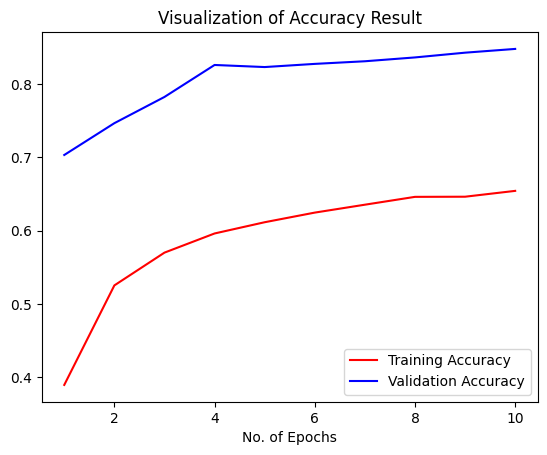

In [25]:
epochs = [i for i in range(1,11)]
plt.plot(epochs,history.history['accuracy'],color='red',label='Training Accuracy')
plt.plot(epochs,history.history['val_accuracy'],color='blue',label='Validation Accuracy')
plt.xlabel('No. of Epochs')
plt.title('Visualization of Accuracy Result')
plt.legend()
plt.show()

In [29]:
test_dir = '/content/drive/MyDrive/Plant-Disease-Detection/Plant_Disease_Detection/valid'


test_set = tf.keras.utils.image_dataset_from_directory(
   test_dir,
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=1,
    image_size=(128, 128),
    shuffle=False,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)


Found 17577 files belonging to 38 classes.


In [31]:
y_pred = model.predict(test_set)
predicted_categories = tf.argmax(y_pred, axis=1)

17577/17577 [==============================] - 522s 30ms/step


In [32]:
true_categories = tf.concat([y for x, y in test_set], axis=0)
Y_true = tf.argmax(true_categories, axis=1)

In [33]:
Y_true

<tf.Tensor: shape=(17577,), dtype=int64, numpy=array([ 0,  0,  0, ..., 37, 37, 37])>

In [34]:
predicted_categories

<tf.Tensor: shape=(17577,), dtype=int64, numpy=array([ 0,  0,  0, ..., 37, 37, 37])>

In [35]:
from sklearn.metrics import confusion_matrix,classification_report
cm = confusion_matrix(Y_true,predicted_categories)

In [37]:
class_name = validation_set.class_names

In [38]:
# Precision Recall Fscore
print(classification_report(Y_true,predicted_categories,target_names=class_name))

                                                    precision    recall  f1-score   support

                                Apple___Apple_scab       0.90      0.83      0.86       504
                                 Apple___Black_rot       0.91      0.91      0.91       497
                          Apple___Cedar_apple_rust       0.93      0.90      0.91       440
                                   Apple___healthy       0.90      0.84      0.87       502
                               Blueberry___healthy       0.98      0.96      0.97       454
          Cherry_(including_sour)___Powdery_mildew       0.97      0.95      0.96       426
                 Cherry_(including_sour)___healthy       0.96      0.97      0.97       456
Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot       0.91      0.88      0.89       410
                       Corn_(maize)___Common_rust_       1.00      1.00      1.00       477
               Corn_(maize)___Northern_Leaf_Blight       0.91      0.92      0.

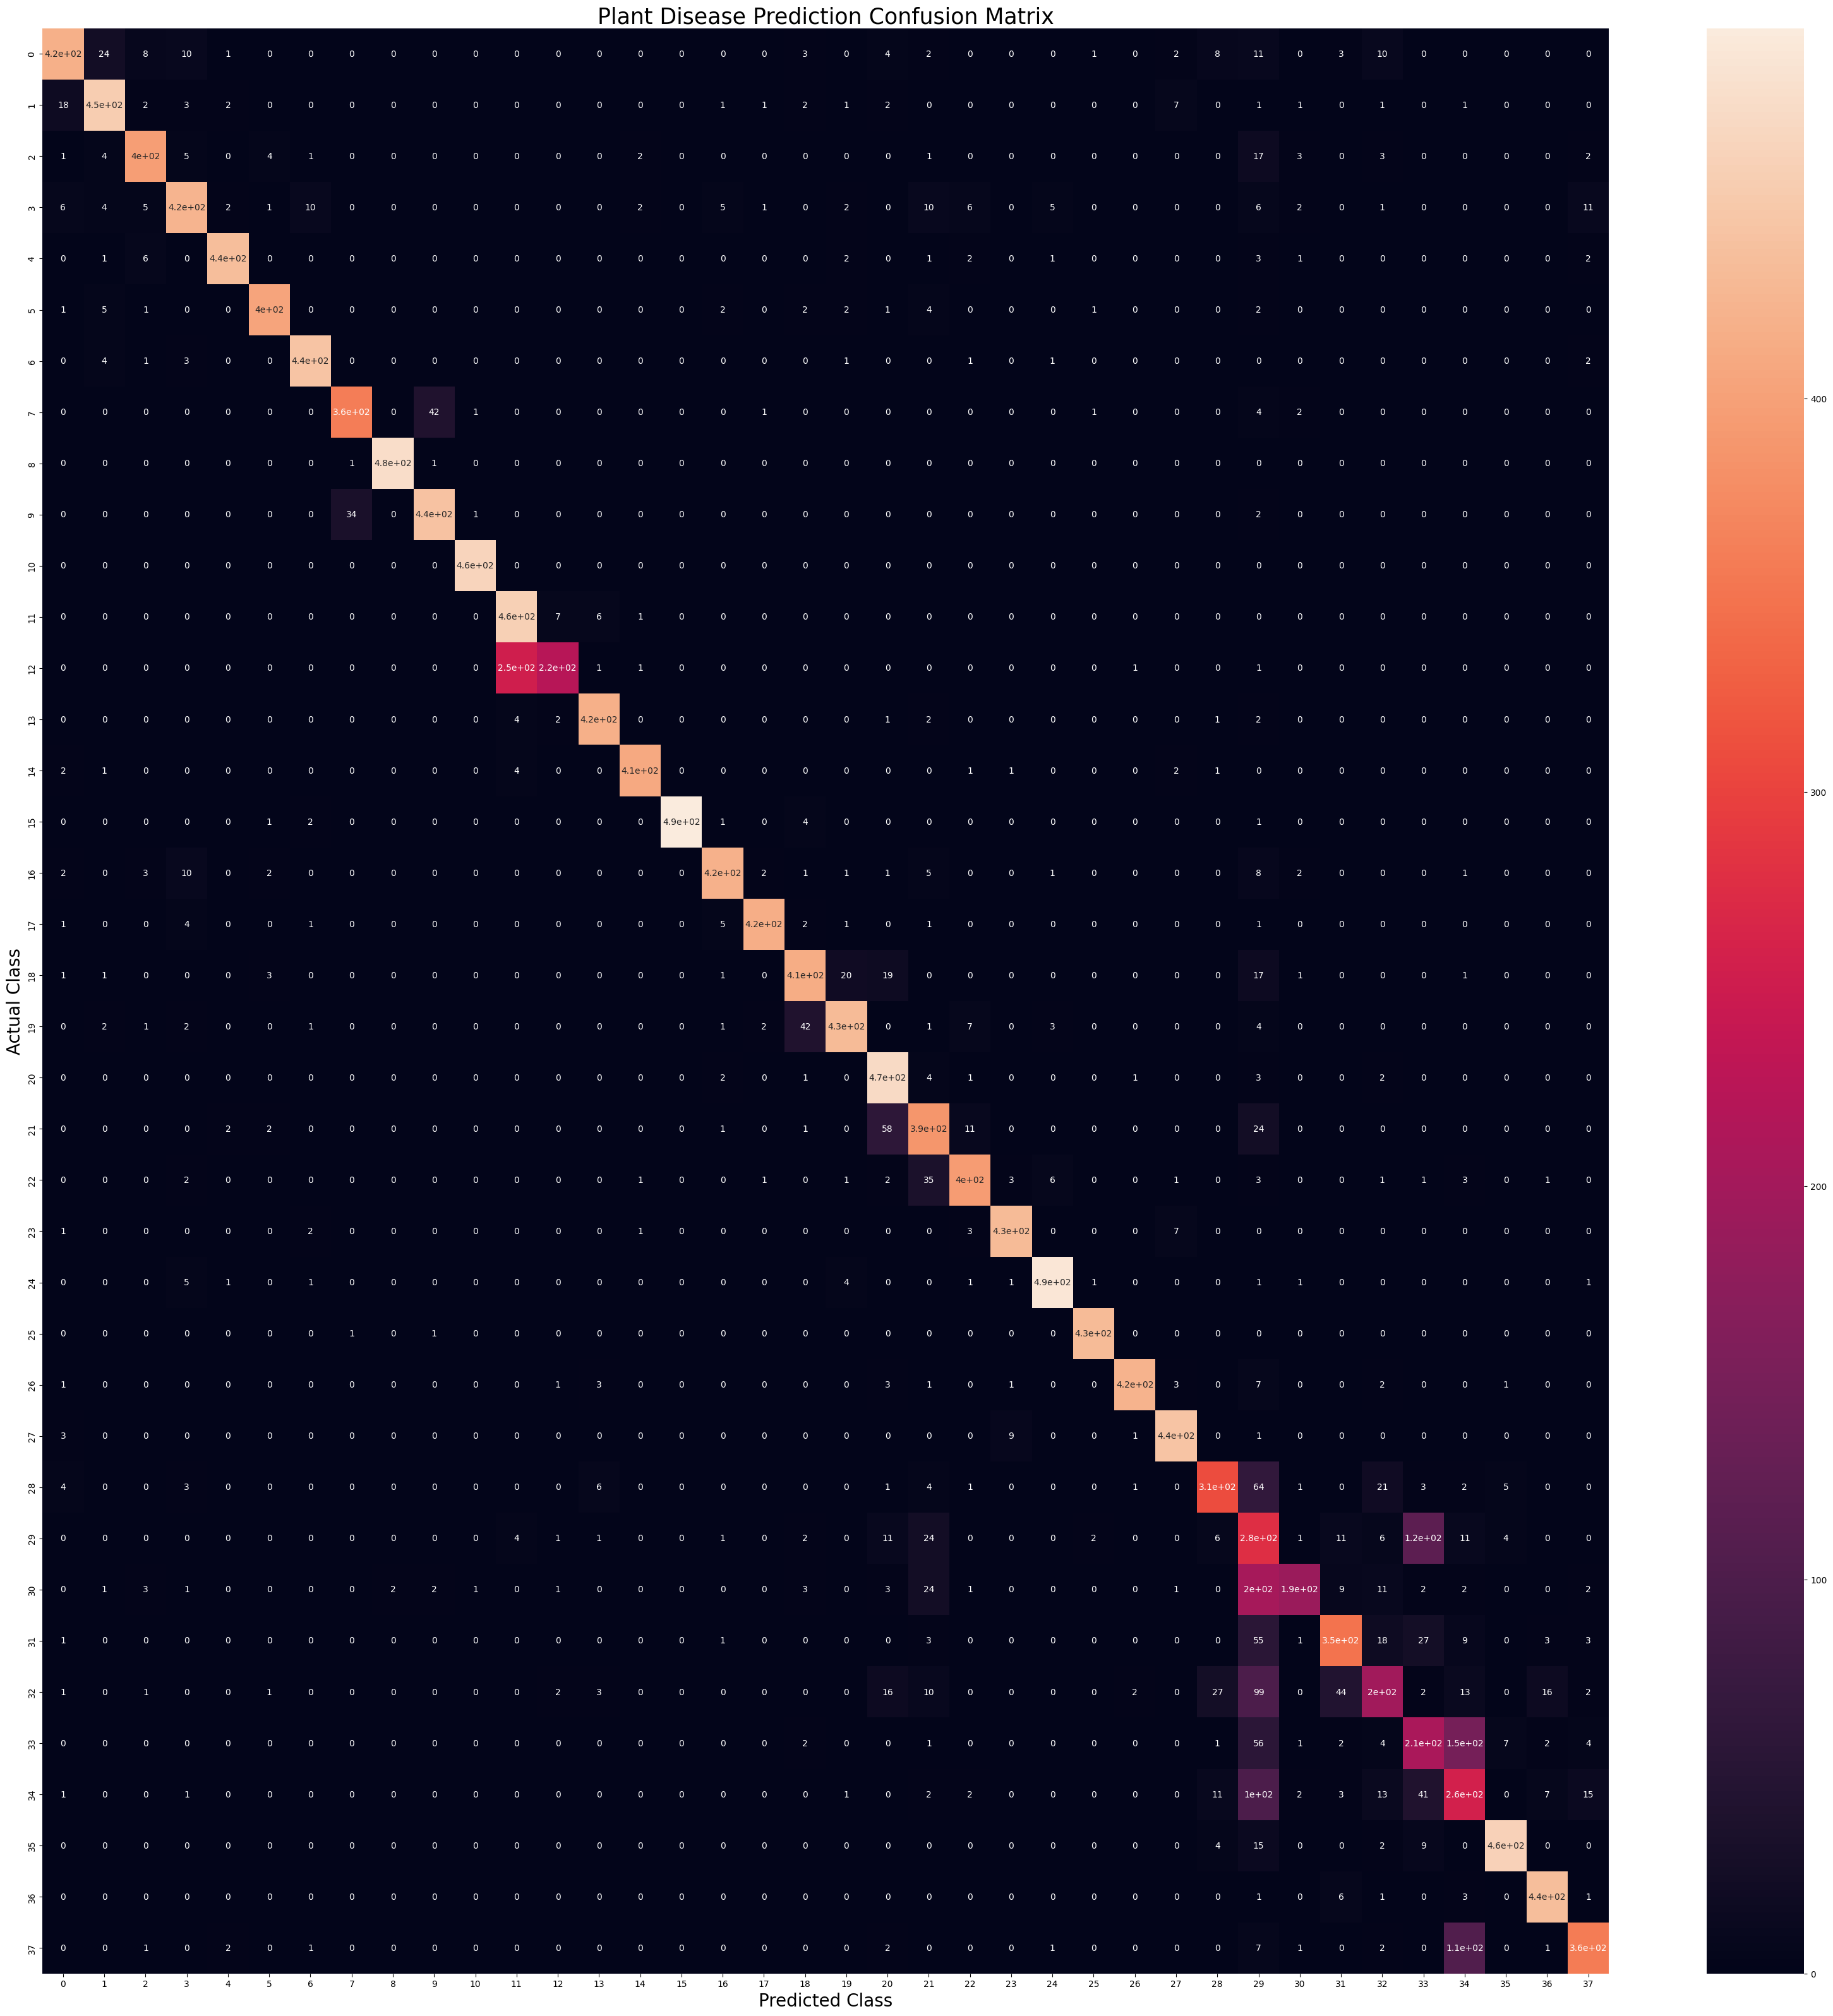

In [39]:
plt.figure(figsize=(40, 40))
sns.heatmap(cm,annot=True,annot_kws={"size": 10})

plt.xlabel('Predicted Class',fontsize = 20)
plt.ylabel('Actual Class',fontsize = 20)
plt.title('Plant Disease Prediction Confusion Matrix',fontsize = 25)
plt.show()